## Women_clothing_Ecommerce_data

In [35]:
# import libraries
import docx2txt

import nltk

from nltk.tokenize import word_tokenize
from nltk.text import Text

import pandas as pd

In [36]:
from textblob import TextBlob

import matplotlib.pyplot as plt

import seaborn as sns

In [37]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [38]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [39]:
df.columns = map(str.lower, df.columns)
#data.columns = [x.lower() for x in data.columns]

In [40]:
df.head()

,unnamed: 0,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [41]:
df.drop(['unnamed: 0','clothing id','recommended ind','positive feedback count'], axis = 1, inplace =True)

In [43]:
# standardizing the columns
df.columns = [col.lower().replace(" ","_") for col in df.columns]

In [44]:
df.head()

,age,title,review_text,rating,division_name,department_name,class_name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,Blouses


## Explorartory Data Analysis

In [45]:
df.describe()

,age,rating
count,23486.000000,23486.000000
mean,43.198544,4.196032
std,12.279544,1.110031
min,18.000000,1.000000
25%,34.000000,4.000000
50%,41.000000,5.000000
75%,52.000000,5.000000
max,99.000000,5.000000


In [46]:
df.shape

(23486, 7)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              23486 non-null  int64 
 1   title            19676 non-null  object
 2   review_text      22641 non-null  object
 3   rating           23486 non-null  int64 
 4   division_name    23472 non-null  object
 5   department_name  23472 non-null  object
 6   class_name       23472 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.3+ MB


In [48]:
# to calculate the percentage of null values
100*df.isna()

,age,title,review_text,rating,division_name,department_name,class_name
0,0,100,0,0,0,0,0
1,0,100,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
23481,0,0,0,0,0,0,0
23482,0,0,0,0,0,0,0
23483,0,0,0,0,0,0,0
23484,0,0,0,0,0,0,0


<AxesSubplot:>

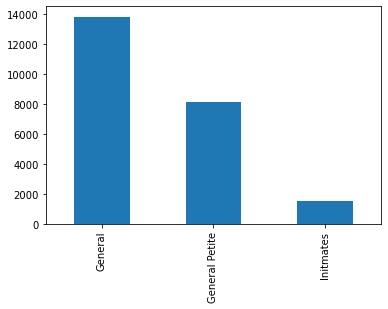

In [50]:
df['division_name'].value_counts().plot(kind='bar')

<AxesSubplot:>

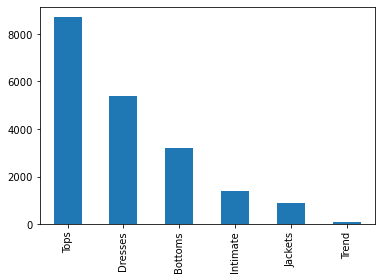

In [56]:
df['department_name'].value_counts().plot(kind='bar')

In [51]:
df['title']

0                                                      NaN
1                                                      NaN
2                                  Some major design flaws
3                                         My favorite buy!
4                                         Flattering shirt
                               ...                        
23481                       Great dress for many occasions
23482                           Wish it was made of cotton
23483                                Cute, but see through
23484    Very cute dress, perfect for summer parties an...
23485                      Please make more like this one!
Name: title, Length: 23486, dtype: object

In [52]:
df.dropna(inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              19662 non-null  int64 
 1   title            19662 non-null  object
 2   review_text      19662 non-null  object
 3   rating           19662 non-null  int64 
 4   division_name    19662 non-null  object
 5   department_name  19662 non-null  object
 6   class_name       19662 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.2+ MB


In [54]:
df['review_text']

2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 19662, dtype: object

In [58]:
def get_len(x):
    # if x is not NaN, then:
    if x==x:
        return len(x)
    # else if x is NaN return 0
    else:
        return 0

In [60]:
# continuation of the above
df['len_rev'] = df['review_text'].apply(lambda x: get_len(x))

<AxesSubplot:xlabel='len_rev', ylabel='Count'>

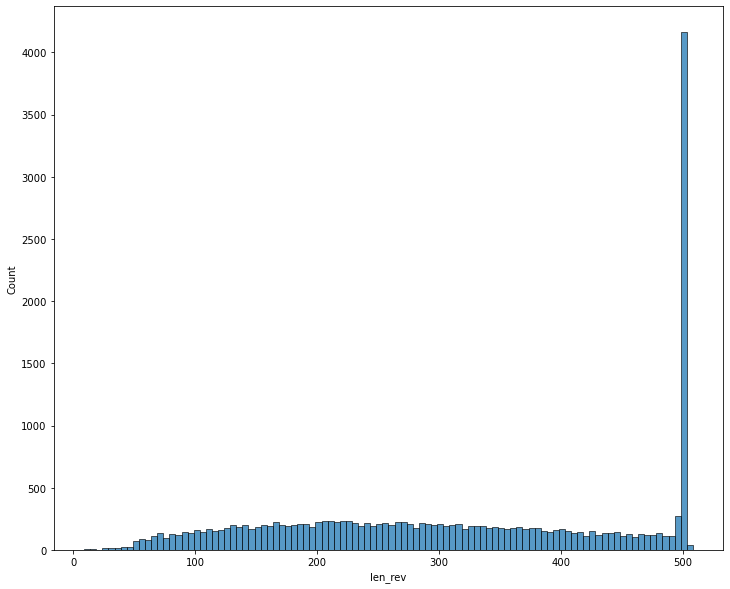

In [61]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df['len_rev'], bins=100, ax=ax)

In [62]:
# to investigate 
df[df['len_rev'] == 500]['review_text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

<AxesSubplot:xlabel='len_rev', ylabel='Count'>

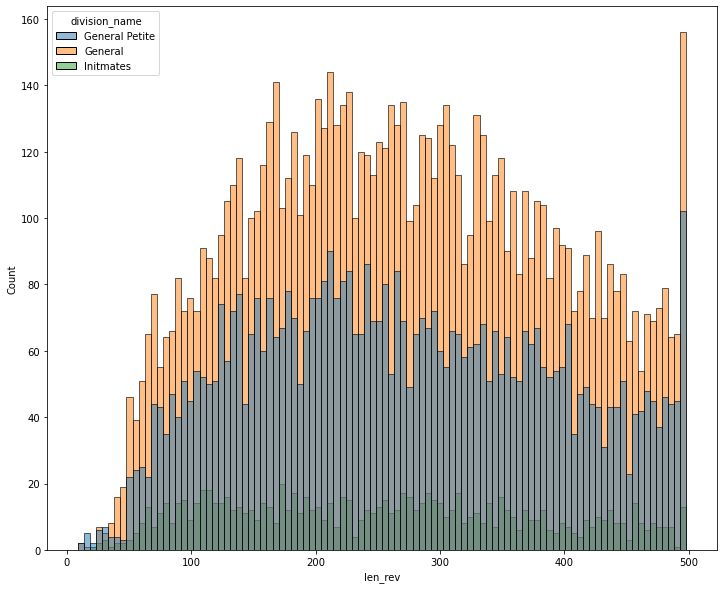

In [63]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df[(df['len_rev'] < 499) & (df['len_rev'] != 0)],
             x='len_rev',
             bins=100,
             ax=ax,
             hue='division_name')

<AxesSubplot:xlabel='len_rev', ylabel='Count'>

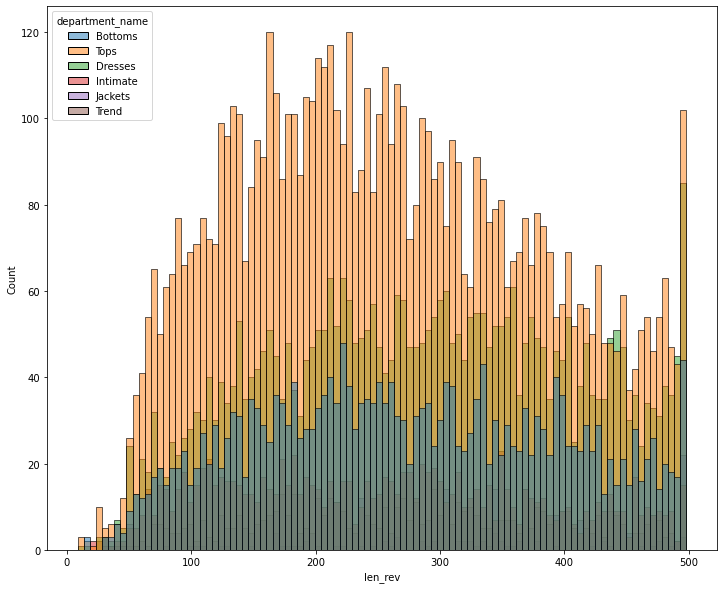

In [64]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df[(df['len_rev'] < 499) & (df['len_rev'] != 0)],
             x='len_rev',
             bins=100,
             ax=ax,
             hue='department_name')

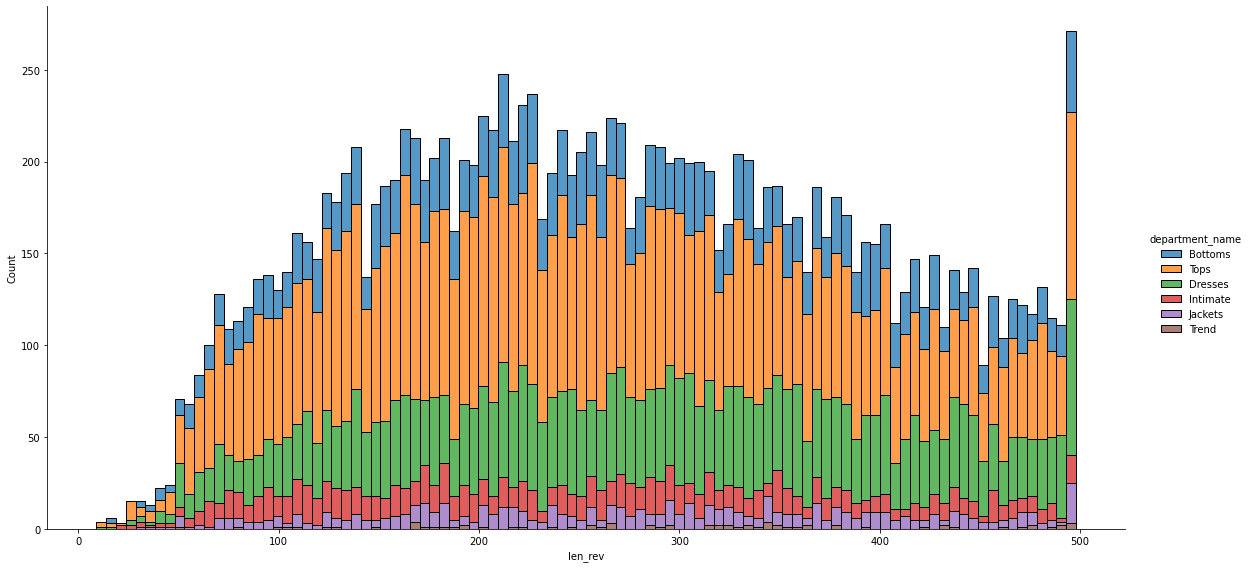

In [65]:
sns.displot(data=df[(df['len_rev']<499) & (df['len_rev']!=0)],
            x="len_rev",
            hue="department_name",
            multiple="stack",
            bins=100,
            height=8,
            aspect=2
           )

In [16]:
df.shape

(19662, 7)

## Data cleaning and wrangling steps

In [17]:
df['review text'] = [word.lower() for word in df['review text']]

In [18]:
df.head()

,age,title,review text,rating,division name,department name,class name
2,60,Some major design flaws,i had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants
4,47,Flattering shirt,this shirt is very flattering to all due to th...,5,General,Tops,Blouses
5,49,Not for the very petite,"i love tracy reese dresses, but this one is no...",2,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,General Petite,Tops,Knits


In [19]:
df.shape

(19662, 7)

In [20]:
from nltk.corpus import stopwords

In [21]:
stop_words = stopwords.words('english')

In [115]:
#stop_words

In [22]:
df['review text'] = [word for word in df['review text'] if not word in stop_words]

In [23]:
df.head()

,age,title,review text,rating,division name,department name,class name
2,60,Some major design flaws,i had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants
4,47,Flattering shirt,this shirt is very flattering to all due to th...,5,General,Tops,Blouses
5,49,Not for the very petite,"i love tracy reese dresses, but this one is no...",2,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,General Petite,Tops,Knits


In [24]:
def remove_stops(row):
    my_list = row['review text']
    meaningful_words = [w for w in my_list if not w in stop_words]
    return (meaningful_words)

df['review text'] = df.apply(remove_stops, axis=1)

In [26]:
df

,age,title,review text,rating,division name,department name,class name
2,60,Some major design flaws,"[ , h, , u, c, h, , h, g, h, , h, p, e, , ...",3,General,Dresses,Dresses
3,50,My favorite buy!,"[ , l, v, e, ,, , l, v, e, ,, , l, v, e, , ...",5,General Petite,Bottoms,Pants
4,47,Flattering shirt,"[h, , h, r, , , v, e, r, , f, l, e, r, n, ...",5,General,Tops,Blouses
5,49,Not for the very petite,"[ , l, v, e, , r, c, , r, e, e, e, , r, e, ...",2,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,"[ , e, , h, , n, , , b, k, e, , , h, e, ...",5,General Petite,Tops,Knits
...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,"[ , w, , v, e, r, , h, p, p, , , n, g, , ...",5,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"[ , r, e, n, , e, , f, , e, r, n, , c, l, ...",3,General Petite,Tops,Knits
23483,31,"Cute, but see through","[h, , f, , w, e, l, l, ,, , b, u, , h, e, ...",3,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...","[ , b, u, g, h, , h, , r, e, , f, r, , , ...",3,General,Dresses,Dresses


In [27]:
print(df['review text'][2])

[' ', 'h', ' ', 'u', 'c', 'h', ' ', 'h', 'g', 'h', ' ', 'h', 'p', 'e', ' ', 'f', 'r', ' ', 'h', ' ', 'r', 'e', ' ', 'n', ' ', 'r', 'e', 'l', 'l', ' ', 'w', 'n', 'e', ' ', ' ', ' ', 'w', 'r', 'k', ' ', 'f', 'r', ' ', 'e', '.', ' ', ' ', 'n', 'l', 'l', ' ', 'r', 'e', 'r', 'e', ' ', 'h', 'e', ' ', 'p', 'e', 'e', ' ', 'l', 'l', ' ', '(', ' ', 'u', 'u', 'l', ' ', 'z', 'e', ')', ' ', 'b', 'u', ' ', ' ', 'f', 'u', 'n', ' ', 'h', ' ', ' ', 'b', 'e', ' ', 'u', 'r', 'g', 'e', 'u', 'l', ' ', 'l', 'l', '.', ' ', ' ', 'l', 'l', ' ', 'n', ' ', 'f', 'c', ' ', 'h', ' ', ' ', 'c', 'u', 'l', ' ', 'n', ' ', 'z', 'p', ' ', ' ', 'u', 'p', '!', ' ', ' ', 'r', 'e', 'r', 'e', 'r', 'e', ' ', ' ', 'n', ' ', 'p', 'e', 'e', ' ', 'e', 'u', ',', ' ', 'w', 'h', 'c', 'h', ' ', 'w', ' ', 'j', 'u', ' ', 'k', '.', ' ', 'v', 'e', 'r', 'l', 'l', ',', ' ', 'h', 'e', ' ', 'p', ' ', 'h', 'l', 'f', ' ', 'w', ' ', 'c', 'f', 'r', 'b', 'l', 'e', ' ', 'n', ' ', 'f', ' ', 'n', 'c', 'e', 'l', ',', ' ', 'b', 'u', ' ', 'h', 'e', ' ',

## average rating by division and department

In [68]:
df.head(5)

,age,title,review_text,rating,division_name,department_name,class_name,len_rev
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,500
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,124
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,192
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses,Dresses,488
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops,Knits,496


In [31]:
df.groupby(["division name", "department name"])["rating"].count()

division name   department name
General         Bottoms            2121
                Dresses            3165
                Jackets             547
                Tops               5743
                Trend                88
General Petite  Bottoms            1063
                Dresses            2206
                Intimate            188
                Jackets             332
                Tops               2970
                Trend                19
Initmates       Intimate           1220
Name: rating, dtype: int64

In [33]:
df_group = df.groupby(["division name", "department name"])["rating"].mean()

In [34]:
df_group

division name   department name
General         Bottoms            4.263083
                Dresses            4.150079
                Jackets            4.239488
                Tops               4.138255
                Trend              3.875000
General Petite  Bottoms            4.336783
                Dresses            4.118314
                Intimate           4.223404
                Jackets            4.322289
                Tops               4.191582
                Trend              3.789474
Initmates       Intimate           4.263115
Name: rating, dtype: float64

In [67]:
df_by_div_dep = df.groupby(['division_name', 'department_name']).agg({'rating':'mean'}).reset_index()

In [69]:
df_by_div_dep["div_dep"] = df_by_div_dep['division_name'] + " " + df_by_div_dep['department_name']

In [70]:
df_by_div_dep["div_dep"]

0             General Bottoms
1             General Dresses
2             General Jackets
3                General Tops
4               General Trend
5      General Petite Bottoms
6      General Petite Dresses
7     General Petite Intimate
8      General Petite Jackets
9         General Petite Tops
10       General Petite Trend
11         Initmates Intimate
Name: div_dep, dtype: object

<AxesSubplot:ylabel='div_dep'>

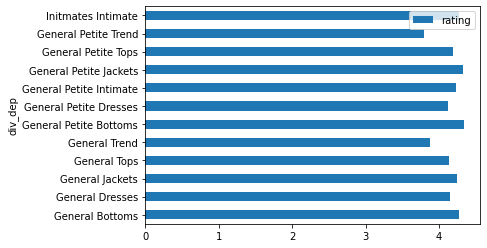

In [71]:
df_by_div_dep.plot(kind="barh", y='rating', x='div_dep')

## sentiment analysis

In [72]:
df.head()

,age,title,review_text,rating,division_name,department_name,class_name,len_rev
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,500
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,124
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,192
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses,Dresses,488
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops,Knits,496


In [74]:
text = df.iloc[5]['review_text']

In [75]:
testimonial = TextBlob(text)

In [76]:
testimonial.sentiment.polarity

0.17163461538461539

In [77]:
testimonial.sentences

[Sentence("I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants)."),
 Sentence("everything went with it."),
 Sentence("the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc."),
 Sentence("my only compaint is it is a bit big, sleeves are long and it doesn't go in petite."),
 Sentence("also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...")]

In [ ]:
## remove any rows in your data which contain have null in the review column

In [79]:
df['review_text'].isna().sum()

0

In [ ]:
#df = df.dropna(subset=['review text'], how = 'any')

In [80]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [82]:
df['review_text'].apply(get_polarity)

2        0.073675
3        0.550000
4        0.512891
5        0.178750
6        0.133750
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: review_text, Length: 19662, dtype: float64

In [84]:
df['polarity'] = df['review_text'].apply(get_polarity)

In [85]:
df.head(5)

,age,title,review_text,rating,division_name,department_name,class_name,len_rev,polarity
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,500,0.073675
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,124,0.550000
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,192,0.512891
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses,Dresses,488,0.178750
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops,Knits,496,0.133750


In [86]:
df_min_pol = df.groupby(['division_name','department_name']).agg({'polarity':'min'}).reset_index()

In [87]:
df_min_pol['div_dep'] = df_min_pol['division_name'] + " " + df_min_pol['department_name']
df_min_pol

,division_name,department_name,polarity,div_dep
0,General,Bottoms,-0.533333,General Bottoms
1,General,Dresses,-0.916667,General Dresses
2,General,Jackets,-0.750000,General Jackets
3,General,Tops,-0.975000,General Tops
4,General,Trend,-0.266667,General Trend
5,General Petite,Bottoms,-0.257778,General Petite Bottoms
6,General Petite,Dresses,-0.350000,General Petite Dresses
7,General Petite,Intimate,-0.230000,General Petite Intimate
8,General Petite,Jackets,-0.562500,General Petite Jackets
9,General Petite,Tops,-0.700000,General Petite Tops


<AxesSubplot:ylabel='div_dep'>

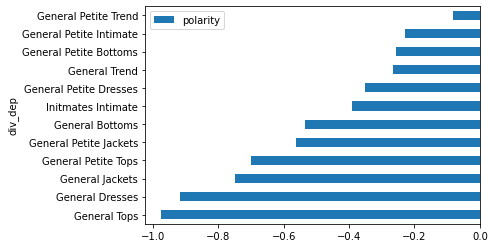

In [88]:
df_min_pol = df_min_pol.sort_values(by='polarity')
df_min_pol.plot(kind="barh", y='polarity', x='div_dep')

In [89]:
df_mean_pol = df.groupby(['division_name', 'department_name']).agg({'polarity':'mean'}).reset_index()

<AxesSubplot:ylabel='div_dep'>

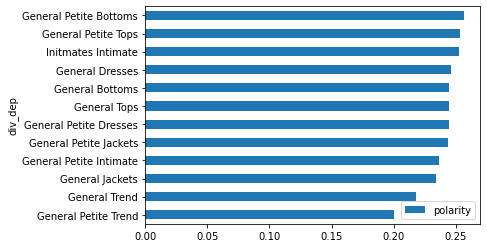

In [90]:
df_mean_pol = df_mean_pol.sort_values(by='polarity')
df_mean_pol['div_dep'] = df_mean_pol['division_name'] + " " + df_mean_pol['department_name']
df_mean_pol.plot(kind='barh', y='polarity', x='div_dep')